<a href="https://colab.research.google.com/github/Joocheol/Financial-Engineering/blob/master/Two_versions_of_delta_hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Delta$

$S_0$

$\max(S_T - K, 0)$

$\Delta_0 S_0$





In [42]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [7]:
r = 0.00
sig = 0.2
T = 30/365

M = 100
N = 30

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt)

In [61]:
np.random.seed(3119)
S0 = 100

S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

In [62]:
for i in range(M):
    S[i,0] = S0
    for j in range(N):
        S[i,j+1] = S[i,j] * (1+rv[i,j])

$(\Delta_0 - 0) S_0 + (\Delta_1 - \Delta_0) S_1 + (\Delta_2 - \Delta_1) S_{2} + \cdots + (\Delta_{T-1} - \Delta_{T-2}) S_{T-1}+ (\Delta_{T} - \Delta_{T-1}) S_T$

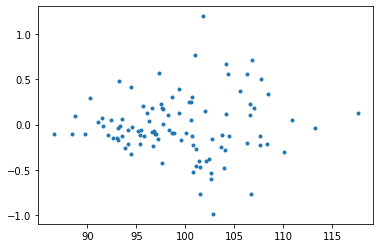

In [67]:
a = []

K = 103

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + (delta-hedge) * S[i,j]
        hedge = delta
    
    cost = cost - hedge * S[i,N] + max(S[i,N]-K, 0) - 1.2
        

    a.append(cost)

plt.plot(S[:,-1], a, marker=".", linestyle='none')
plt.show()

$(\Delta_0 - 0) S_0 + (\Delta_1 - \Delta_0) S_1 + (\Delta_2 - \Delta_1) S_{2} + \cdots + (\Delta_{T-1} - \Delta_{T-2}) S_{T-1}+ (\Delta_{T} - \Delta_{T-1}) S_T$

$\Delta_0 (S_0-S_1) + \Delta_1 (S_1-S_2) + \Delta_2 (S_2-S_3) + \cdots + \Delta_{T-1} (S_{T-1}-S_T) + \Delta_T S_T$

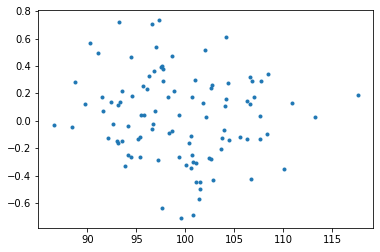

In [70]:
a = []

K = 100

for i in range(M):
    cost = 0
    price = S[i,0]
    for j in range(N):
        d1 = (np.log(price/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + delta*(price-S[i,j+1])
        price = S[i,j+1]
    
    cost = cost + max(S[i,N]-K, 0) - 2.29
        

    a.append(cost)

plt.plot(S[:,-1], a, marker=".", linestyle='none')
plt.show()

In [65]:
def bscall(S, K, T, r, sig):
    d1 = (np.log(S/K)+(r+0.5*sig**2)*T)/(sig*np.sqrt(T))
    d2 = (np.log(S/K)+(r-0.5*sig**2)*T)/(sig*np.sqrt(T))
    return S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    
def bsput(S, K, T, r, sig):
    d1 = (np.log(S/K)+(r+0.5*sig**2)*T)/(sig*np.sqrt(T))
    d2 = (np.log(S/K)+(r-0.5*sig**2)*T)/(sig*np.sqrt(T))
    return K*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)

In [66]:
bscall(100,100,30/365,0.0,0.2)

2.2871506280449694